# Yapay sinir ağları CIFAR veri seti ile Uygulama

## Gerekli kütüphanelerin yüklenmesi

### Kütüphaneler ve Fonksiyonlar

1. **tensorflow (`import tensorflow as tf`)**:
   - TensorFlow, Google tarafından geliştirilen açık kaynaklı bir makine öğrenimi kütüphanesidir.
   - Derin öğrenme modelleri oluşturmak, eğitmek ve değerlendirmek için kullanılır.
   - Keras API'sini içerir ve model oluşturma, katmanlar, optimizasyon ve metrikler gibi yüksek seviye API sağlar.

2. **tensorflow.keras.datasets (`from tensorflow.keras.datasets import cifar10`)**:
   - Keras içinde bulunan `datasets` modülü, önceden yüklü popüler veri setlerine erişim sağlar.
   - `cifar10` modülü, CIFAR-10 veri setini yüklemek için kullanılır. CIFAR-10, 10 farklı sınıfa ait 60,000 renkli görüntüden oluşan bir veri setidir.

3. **tensorflow.keras.models (`from tensorflow.keras.models import Sequential`)**:
   - Keras içinde bulunan `models` modülü, sinir ağı modellerini oluşturmak için kullanılır.
   - `Sequential` sınıfı, katmanları sıralı bir şekilde birleştirilmiş bir model oluşturur.

4. **tensorflow.keras.layers (`from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout`)**:
   - `layers` modülü, farklı tipteki katmanları içerir ve bu katmanları model oluştururken kullanabiliriz.
   - `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense` ve `Dropout` gibi sık kullanılan katmanlar bu modülde bulunur.
   - Örneğin, Conv2D katmanı 2 boyutlu evrişim katmanı, Dense katmanı tam bağlı (fully connected) katman ve MaxPooling2D katmanı evrişim sonrası azaltma katmanıdır.

5. **tensorflow.keras.utils (`from tensorflow.keras.utils import to_categorical`)**:
   - `utils` modülü, yardımcı işlevleri içerir.
   - `to_categorical` işlevi, etiketleri one-hot encode yapmak için kullanılır. Yani, çok sınıflı sınıflandırma problemlerinde etiketleri (örneğin, 0'dan 9'a kadar olan sınıflar) binary (1 ve 0'lar) vektörlerine dönüştürür.

6. **matplotlib.pyplot (`import matplotlib.pyplot as plt`)**:
   - `matplotlib.pyplot` modülü, verileri görselleştirmek için kullanılır.
   - Grafikler, histogramlar, görüntüler ve diğer görsel temsiller oluşturmak için yaygın olarak kullanılır.
   - Örneğin, model eğitimini görselleştirmek veya veri seti üzerinde örnek görüntüleri göstermek için kullanılabilir.

7. **numpy (`import numpy as np`)**:
   - `numpy` kütüphanesi, Python'da bilimsel hesaplama için temel bir pakettir.
   - Diziler, matrisler ve diğer çok boyutlu veri yapıları üzerinde hızlı matematiksel işlemler yapmak için kullanılır.
   - Örneğin, veri manipülasyonu, dizi işlemleri ve model eğitimi sırasında veri işleme için sıklıkla kullanılır.

In [ ]:
!pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## Veri Seti

### Veri seti yükleme

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Rastgele bir görüntü seçin
random_index = np.random.randint(0, len(x_train))
random_image = x_train[random_index]
random_label = y_train[random_index][0]

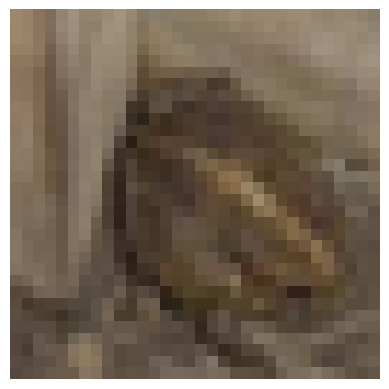

In [4]:
# Görüntüyü gösterin
plt.imshow(random_image)
plt.axis('off')
plt.show()

array([[[157, 136, 108],
        [152, 130, 106],
        [139, 116,  94],
        ...,
        [151, 133, 114],
        [144, 128, 109],
        [137, 124, 107]],

       [[156, 135, 107],
        [152, 131, 106],
        [139, 117,  95],
        ...,
        [155, 138, 118],
        [151, 135, 117],
        [142, 129, 112]],

       [[156, 135, 107],
        [153, 131, 106],
        [140, 118,  96],
        ...,
        [153, 136, 116],
        [148, 132, 114],
        [150, 137, 120]],

       ...,

       [[ 84,  70,  60],
        [ 74,  60,  51],
        [100,  86,  77],
        ...,
        [ 94,  80,  67],
        [100,  86,  72],
        [101,  87,  74]],

       [[ 89,  75,  66],
        [ 86,  72,  63],
        [ 93,  79,  70],
        ...,
        [ 96,  82,  69],
        [104,  90,  77],
        [109,  95,  82]],

       [[ 86,  72,  63],
        [ 91,  77,  68],
        [ 96,  82,  73],
        ...,
        [ 96,  82,  69],
        [ 91,  77,  64],
        [ 99,  85,  72]]], dtype=uint8)
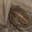

In [5]:
random_image

In [6]:
random_image.shape

(32, 32, 3)

### Veri Seti görselleştirme

CIFAR-10, görüntü tanıma ve sınıflandırma alanında yaygın olarak kullanılan bir veri setidir.
10 farklı sınıfa ait küçük renkli görüntülerden oluşur ve makine öğrenimi algoritmalarını eğitmek ve değerlendirmek için sıklıkla kullanılır.


**Görüntü Sayısı:**

Eğitim Verisi: 50,000 görüntü
Test Verisi: 10,000 görüntü
Görüntü Boyutu: Her görüntü 32x32 piksel boyutunda ve renkli (RGB).

**Sınıflar:**
Veri seti, her biri 6,000 görüntüden oluşan 10 sınıfa sahiptir. Sınıflar şunlardır:

* Uçak (airplane)

* Otomobil (automobile)

* Kuş (bird)

* Kedi (cat)

* Geyik (deer)

* Köpek (dog)

* Kurbağa (frog)

* At (horse)

* Gemi (ship)

* Kamyon (truck)

**Veri Setinin Yapısı:**

Her sınıf için 5,000 eğitim görüntüsü ve 1,000 test görüntüsü bulunur.

In [7]:
# CIFAR-10 sınıf adları
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
# Eğitim veri setinden rastgele 16 görüntü seçin
num_samples = 16
random_indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
sample_images = x_train[random_indices]
sample_labels = y_train[random_indices]

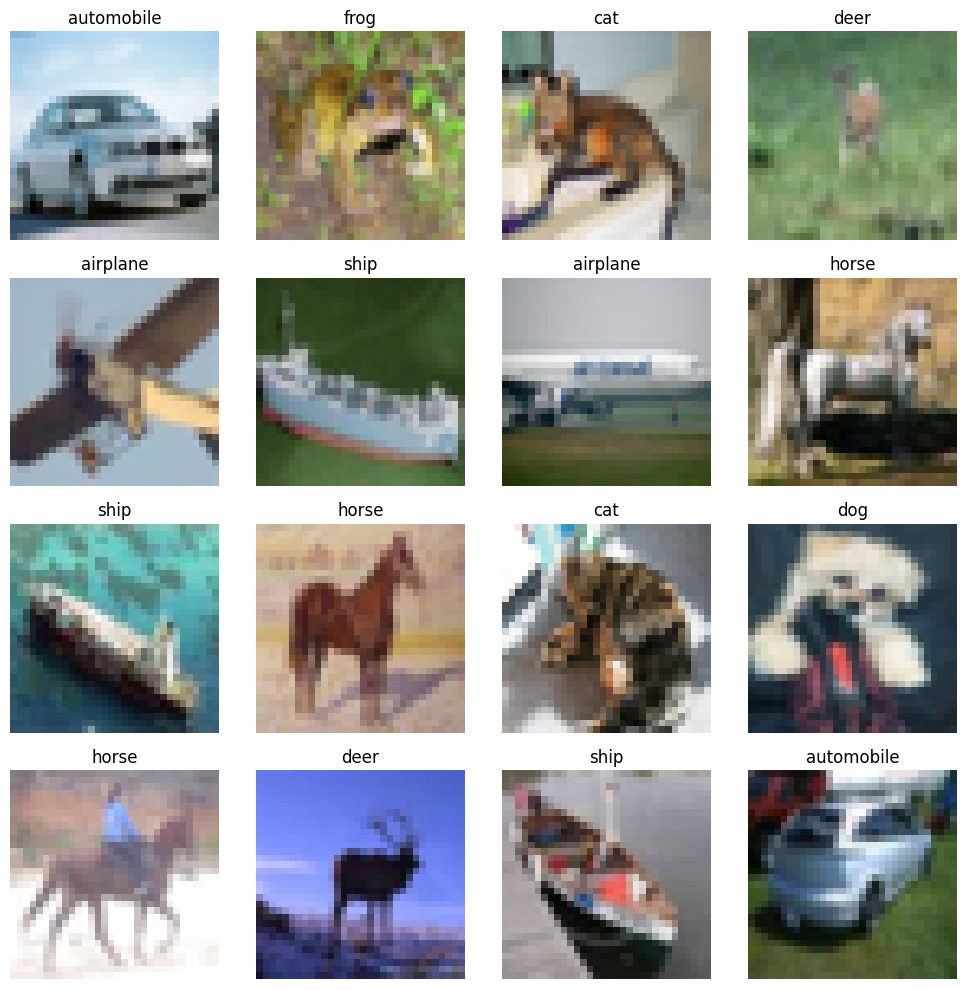

In [9]:
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_names[int(sample_labels[i][0])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
#Normalizasyon
x_train = x_train/255
x_test = x_test/255

In [11]:
num_samples = 16
random_indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
sample_images = x_train[random_indices]
sample_labels = y_train[random_indices]

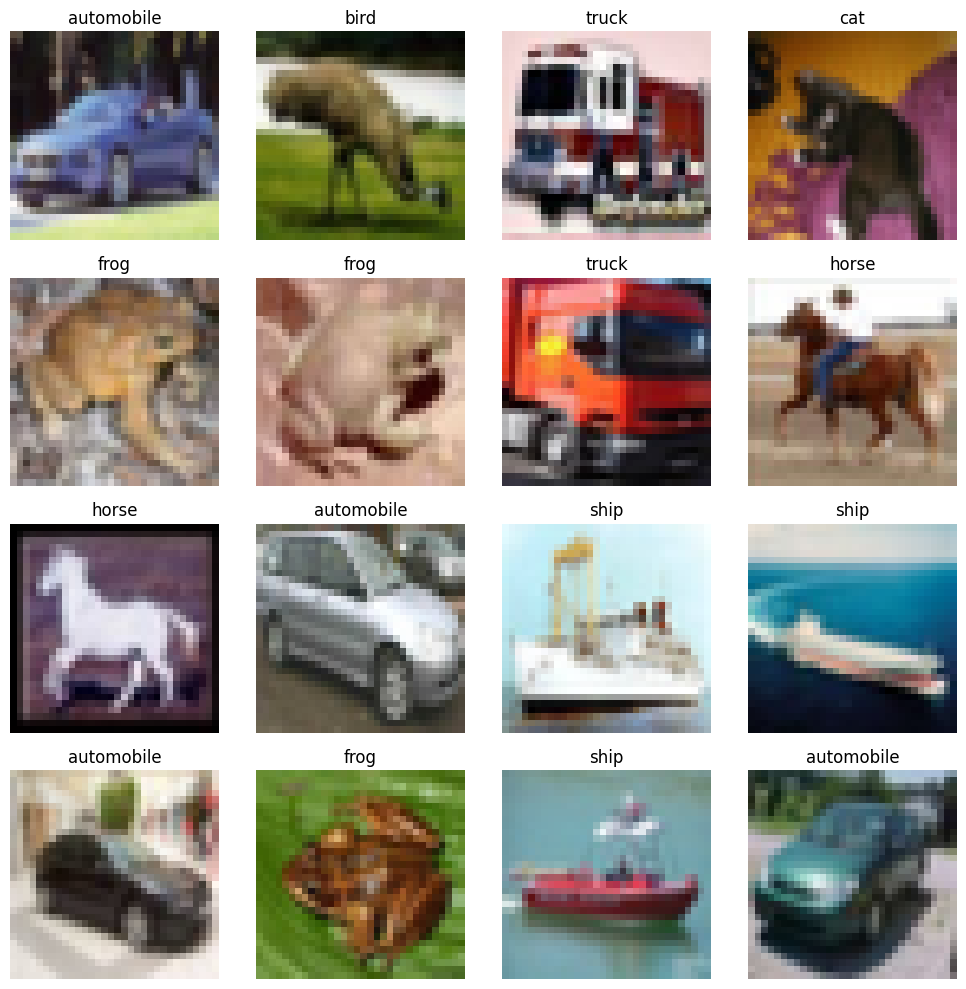

In [12]:
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_names[int(sample_labels[i][0])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
#Sınıf isimlerini değiştirme
class_names = ["Uçak", "Otomobil", "Kuş", "Kedi", "Geyik", "Köpek", "Kurbağa", "At", "Gemi", "Kamyon"]

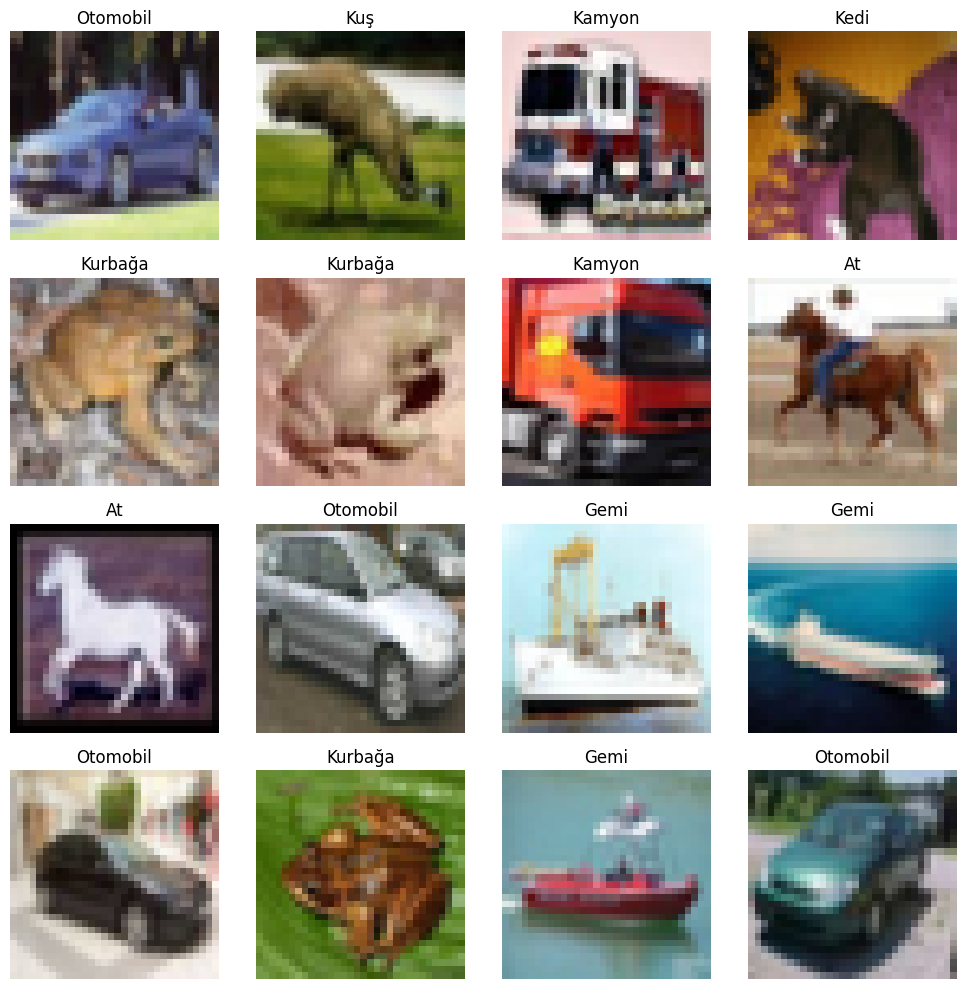

In [14]:
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_names[int(sample_labels[i][0])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
#çıkış katmanını 10 sınıf olduğunu belirtme
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Model Oluşturma

Bu satırda kullanılan `Conv2D` katmanının parametrelerini detaylı olarak açıklayalım:

```python
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
```

- **Conv2D**: Evrişim katmanı, 2 boyutlu bir evrişim işlemi uygular. Giriş verisi, genellikle bir görüntü veya 2D matris olur.

- **32**: İlk parametre, katmandaki filtrelerin (kernel) sayısını belirtir. Bu durumda 32 filtre kullanılacak.

- **(3, 3)**: İkinci parametre, filtrelerin boyutunu belirtir. Her filtre 3x3 boyutunda olacak.

- **activation='relu'**: Aktivasyon fonksiyonu olarak ReLU (Rectified Linear Unit) kullanılacak. Bu fonksiyon, negatif girişler için 0 çıktısı üretirken, pozitif girişler için doğrudan girişi geçirir.

- **input_shape=(32, 32, 3)**: Giriş verisinin şeklini belirtir. Bu durumda, 32x32 piksel boyutunda ve 3 kanala (RGB) sahip bir giriş bekleniyor.

In [16]:
model = Sequential()
# 1. Evrişim katmanı
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# 2. Evrişim katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# Tam bağlantılı katmanlar
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))  # 10 sınıf olduğundan 10 nöronlu çıkış katmanı

## Derleme

In [17]:
# Modeli derleyin
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Eğitim

In [18]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 17s 9ms/step - loss: 2.9401 - accuracy: 0.2420 - val_loss: 3.5895 - val_accuracy: 0.1000
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 2.4467 - accuracy: 0.2136 - val_loss: 1.9952 - val_accuracy: 0.2863
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 2.1546 - accuracy: 0.2112 - val_loss: 2.0986 - val_accuracy: 0.2559
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 2.1052 - accuracy: 0.2251 - val_loss: 1.9967 - val_accuracy: 0.3052
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 1.9518 - accuracy: 0.3058 - val_loss: 1.8363 - val_accuracy: 0.3519
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 1.8722 - accuracy: 0.3235 - val_loss: 1.8573 - val_accuracy: 0.3478
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 2.3512 - accuracy: 0.2956 - val_loss: 3.5779 - val_accuracy: 0.1298
Epoch

## Değerlendirme

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

896 sayısı, ilk evrişimli katmanın (Conv2D) toplam parametre sayısını ifade eder.
Bu sayıyı hesaplamak için;
* filtre (kernel) sayısı,
* filtre boyutu,
* giriş kanal sayısı
* bias terimleri dikkate alınır.

**Parametre Sayısı Hesaplama**

*İlk Conv2D katmanı için:*

Filtre (kernel) sayısı: 32
Filtre boyutu: 3x3
Giriş kanal sayısı: 3 (RGB görüntü olduğu için)
Hesaplama Adımları
Filtre başına parametre sayısı:
Her bir filtre (3x3x3), her bir giriş kanalına uygulanır.
her bir filtre için bir bias terimi eklenir.

Parametre sayısı = filtre genişliği * filtre yüksekliği * giriş kanalları + bias

 = 3 * 3 * 3 + 1 = 28

Toplam filtre sayısı: 32

Toplam parametre sayısı = filtre başına parametre sayısı * filtre sayısı = 28 * 32 = 896

Bu nedenle, ilk Conv2D katmanının toplam parametre sayısı 896'dır.

*İkinci Conv2D katmanı için:*

Filtre Genişliği ve Yüksekliği (Kernel Size): 3x3

Giriş Kanalları (Input Channels): Önceki katmandaki çıktı kanalları, yani 32

Filtre Sayısı (Output Channels): 64

Bias: Her filtre için bir bias



Her Filtre için Parametre Sayısı:

3 * 3 * 32 + 1 = 289


Toplam Filtre Sayısı: 64

Toplam parametre sayısı = 289 * 64 = 18496





In [20]:
# Modeli değerlendirin
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 2.0962 - accuracy: 0.2033
Test Loss: 2.0961883068084717
Test Accuracy: 0.20329999923706055


### Accuracy (Doğruluk)

**Accuracy**, bir sınıflandırma modelinin doğru tahmin ettiği örneklerin yüzdesidir. Formülü aşağıdaki gibidir:

Accuracy= Doğru Tahmin Sayısı * Toplam Örnek Sayısı

- **Doğru Tahmin Sayısı**: Modelin doğru bir şekilde tahmin ettiği sınıf sayısı.
- **Toplam Örnek Sayısı**: Tüm veri setindeki örneklerin toplam sayısı.

Örneğin, bir modelin 100 örneği varsa ve bunlardan 85'ini doğru bir şekilde sınıflandırıyorsa, accuracy değeri:

Accuracy = 85/100 = 0.85  veya 85%


### Validation Accuracy (Doğrulama Doğruluğu)

**Validation accuracy**, modelin eğitim sırasında görmediği doğrulama (validation) veri seti üzerinde ne kadar iyi performans gösterdiğini ölçen bir metriktir.
Genellikle eğitim sırasında modelin aşırı uyuma (overfitting) geçip geçmediğini kontrol etmek için kullanılır.


- Accuracy (Eğitim doğruluğu), modelin eğitim veri seti üzerinde ne kadar iyi performans gösterdiğini gösterirken, Validation Accuracy ( doğrulama doğruluğu) modelin genelleme yeteneğini yani yeni verilere ne kadar iyi adapte olduğunu gösterir.



### Özet

- **Accuracy**: Genel olarak modelin tüm veri seti üzerinde ne kadar doğru tahmin yaptığını gösterir.
- **Validation Accuracy**: Modelin eğitim sırasında görmediği veri seti üzerinde ne kadar iyi performans gösterdiğini gösterir, genellikle modelin genelleme yeteneğini ölçmek için kullanılır.


Eğitim süreci görselleştirme

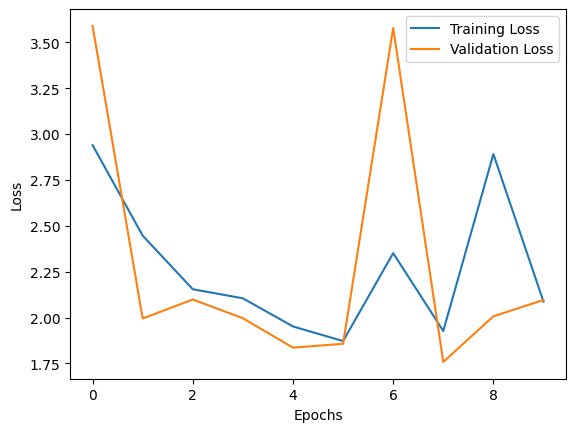

In [21]:
# Eğitim ve doğrulama kaybını görselleştirme
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

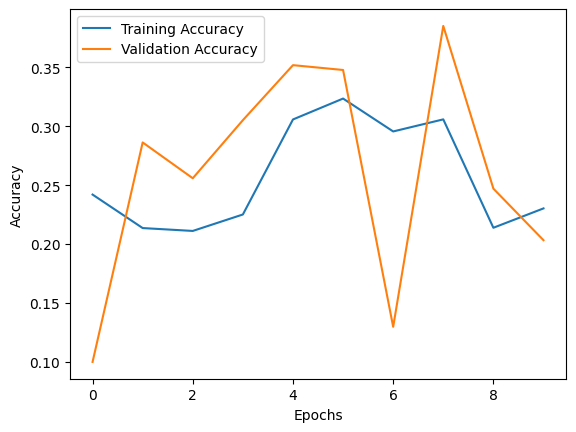

In [22]:
# Eğitim ve doğrulama doğruluğunu görselleştirme
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 2

Aktivasyon fonksiyonu farkını gözlelemek için çıktı katmanında softmax aktivasyon fonksiyonu kullanalım.

In [23]:
model_2 = Sequential()
# 1. Evrişim katmanı
model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_2.add(MaxPooling2D((2, 2)))

# 2. Evrişim katmanı
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D((2, 2)))

# Tam bağlantılı katmanlar
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

In [24]:
# Modeli derleyin
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history_2 = model_2.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4680 - accuracy: 0.4708 - val_loss: 1.1666 - val_accuracy: 0.5893
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0873 - accuracy: 0.6174 - val_loss: 1.0120 - val_accuracy: 0.6510
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9518 - accuracy: 0.6694 - val_loss: 1.0116 - val_accuracy: 0.6450
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8633 - accuracy: 0.7008 - val_loss: 0.9567 - val_accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7935 - accuracy: 0.7215 - val_loss: 0.9237 - val_accuracy: 0.6826
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7373 - accuracy: 0.7432 - val_loss: 0.8941 - val_accuracy: 0.6974
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6876 - accuracy: 0.7588 - val_loss: 0.9009 - val_accuracy:

In [26]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [27]:
# Modeli değerlendirin
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

print(f'Test Loss-2: {loss_2}')
print(f'Test Accuracy-2: {accuracy_2}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9916 - accuracy: 0.6947
Test Loss: 2.0961883068084717
Test Accuracy: 0.20329999923706055
Test Loss-2: 0.9916369915008545
Test Accuracy-2: 0.6947000026702881


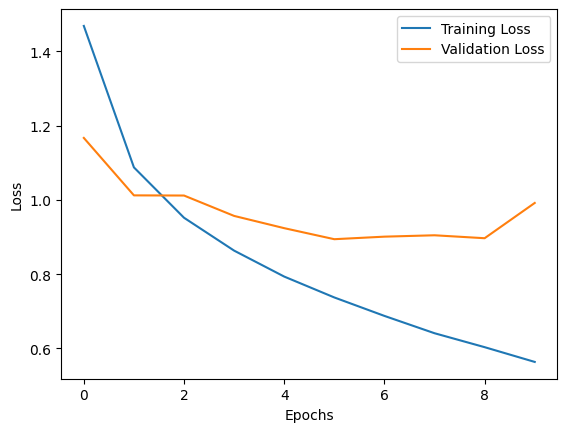

In [28]:
# Eğitim ve doğrulama kaybını görselleştirme
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

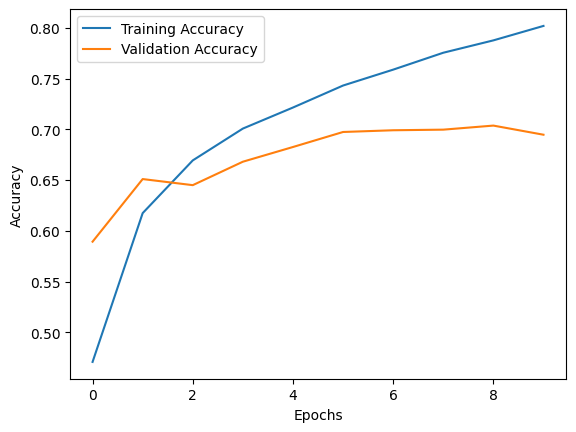

In [29]:
# Eğitim ve doğrulama doğruluğunu görselleştirme
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

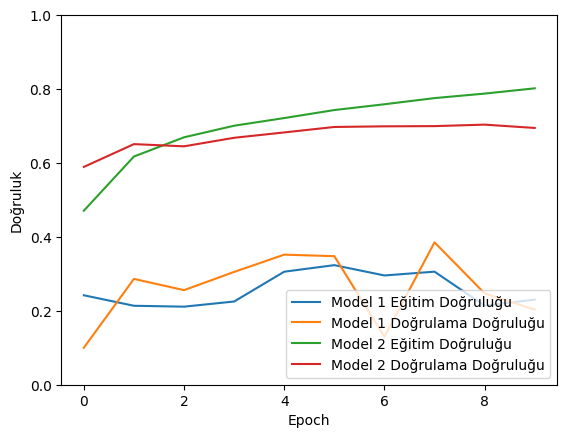

In [30]:
# Model 1 ve Model 2'nin doğruluğunu karşılaştırın
plt.plot(history.history['accuracy'], label='Model 1 Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Model 1 Doğrulama Doğruluğu')
plt.plot(history_2.history['accuracy'], label='Model 2 Eğitim Doğruluğu')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

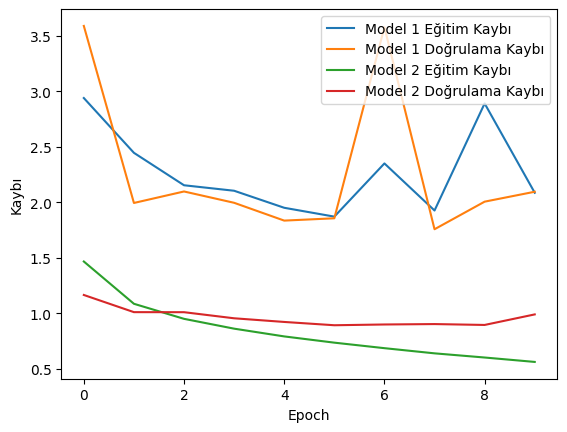

In [31]:
# Model 1 ve Model 2'nin kaybını karşılaştırın
plt.plot(history.history['loss'], label='Model 1 Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Model 1 Doğrulama Kaybı')
plt.plot(history_2.history['loss'], label='Model 2 Eğitim Kaybı')
plt.plot(history_2.history['val_loss'], label='Model 2 Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend(loc='upper right')
plt.show()

#Model3

Katman sayısını artırıp etkisini gözlemleyelim

In [32]:
model_3 = Sequential()
# 1. Evrişim katmanı
model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(MaxPooling2D((2, 2)))
# 2. Evrişim katmanı
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))
# 3. Evrişim katmanı
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))

# Tam bağlantılı katmanlar
model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(10, activation='softmax'))  # 10 sınıf olduğundan 10 nöronlu çıkış katmanı

In [33]:
# Modeli derleyin
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history_3 = model_3.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5470 - accuracy: 0.4350 - val_loss: 1.2941 - val_accuracy: 0.5339
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1936 - accuracy: 0.5756 - val_loss: 1.0949 - val_accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0484 - accuracy: 0.6294 - val_loss: 1.0460 - val_accuracy: 0.6307
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9426 - accuracy: 0.6685 - val_loss: 0.9653 - val_accuracy: 0.6614
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8708 - accuracy: 0.6952 - val_loss: 0.9141 - val_accuracy: 0.6860
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8101 - accuracy: 0.7153 - val_loss: 0.9202 - val_accuracy: 0.6818
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7612 - accuracy: 0.7351 - val_loss: 0.8718 - val_accuracy

In [35]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 2, 2, 64)         

In [36]:
# Modeli değerlendirin
loss_3, accuracy_3 = model_3.evaluate(x_test, y_test)
print(f'Test Loss-3: {loss_3}')
print(f'Test Accuracy-3: {accuracy_3}')

313/313 [==============================] - 1s 3ms/step - loss: 0.8595 - accuracy: 0.7134
Test Loss-3: 0.8595455288887024
Test Accuracy-3: 0.7134000062942505


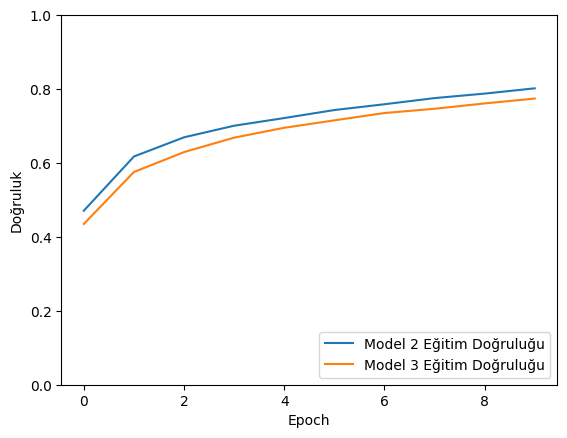

In [37]:
# modellerin doğruluk karşılaştırması
plt.plot(history_2.history['accuracy'], label='Model 2 Eğitim Doğruluğu')
plt.plot(history_3.history['accuracy'], label='Model 3 Eğitim Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

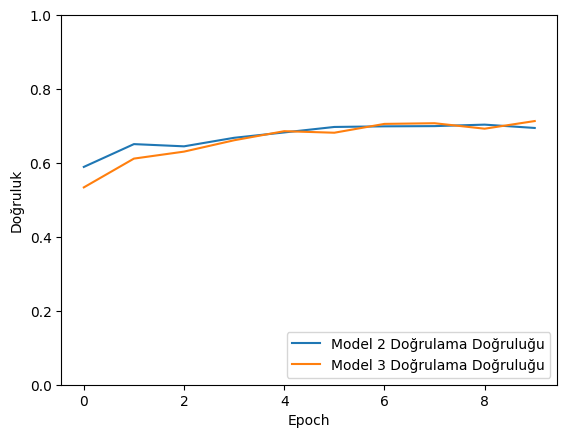

In [38]:
# Modellerin doğruluğunu karşılaştırılması
plt.plot(history_2.history['val_accuracy'], label='Model 2 Doğrulama Doğruluğu')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

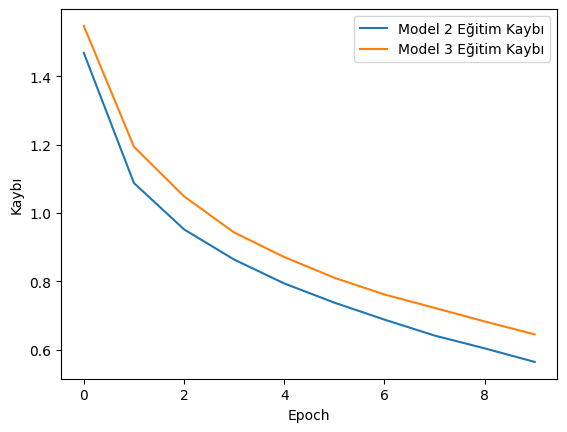

In [50]:
# Model kayıb farkının karşılaştıralım
plt.plot(history_2.history['loss'], label='Model 2 Eğitim Kaybı')
plt.plot(history_3.history['loss'], label='Model 3 Eğitim Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend(loc='upper right')
plt.show()

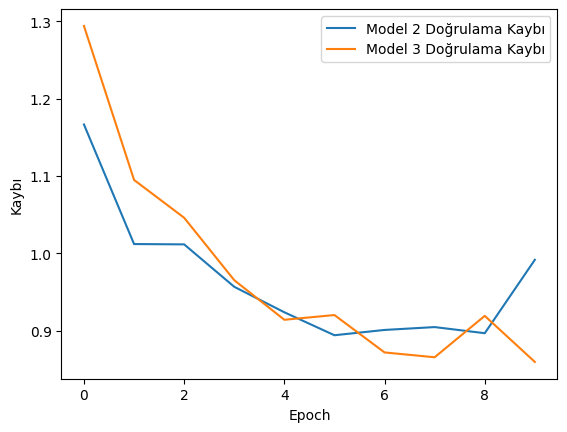

In [51]:
# Model kayıb farkının karşılaştıralım
plt.plot(history_2.history['val_loss'], label='Model 2 Doğrulama Kaybı')
plt.plot(history_3.history['val_loss'], label='Model 3 Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend(loc='upper right')
plt.show()

#model4

optimizer='sgd' optimizer değişikliğinin etkisini inceleyelim

In [41]:
model_4 = Sequential()
# 1. Evrişim katmanı
model_4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_4.add(MaxPooling2D((2, 2)))
# 2. Evrişim katmanı
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D((2, 2)))
# 3. Evrişim katmanı
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D((2, 2)))

# Tam bağlantılı katmanlar
model_4.add(Flatten())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(10, activation='softmax'))  # 10 sınıf olduğundan 10 nöronlu çıkış katmanı

In [42]:
# Modeli derleyin
model_4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
history_4 = model_4.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1340 - accuracy: 0.2095 - val_loss: 1.9492 - val_accuracy: 0.2832
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8208 - accuracy: 0.3407 - val_loss: 1.9350 - val_accuracy: 0.3139
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5925 - accuracy: 0.4269 - val_loss: 1.5061 - val_accuracy: 0.4589
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4529 - accuracy: 0.4762 - val_loss: 1.4157 - val_accuracy: 0.4850
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3515 - accuracy: 0.5169 - val_loss: 1.3342 - val_accuracy: 0.5234
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2766 - accuracy: 0.5476 - val_loss: 1.3150 - val_accuracy: 0.5263
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2098 - accuracy: 0.5721 - val_loss: 1.2361 - val_accuracy

In [44]:
# Modeli değerlendirin

print(f'Test Loss-3: {loss_3}')
print(f'Test Accuracy-3: {accuracy_3}')

# Modeli değerlendirin
loss_4, accuracy_4 = model_4.evaluate(x_test, y_test)
print(f'Test Loss-4: {loss_4}')
print(f'Test Accuracy-4: {accuracy_4}')

Test Loss-3: 0.8595455288887024
Test Accuracy-3: 0.7134000062942505
313/313 [==============================] - 1s 3ms/step - loss: 1.0831 - accuracy: 0.6267
Test Loss-4: 1.0830988883972168
Test Accuracy-4: 0.6266999840736389


#model5

Epoch sayısının etkisini inceleyelim

In [45]:
model_5 = Sequential()
# 1. Evrişim katmanı
model_5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_5.add(MaxPooling2D((2, 2)))
# 2. Evrişim katmanı
model_5.add(Conv2D(64, (3, 3), activation='relu'))
model_5.add(MaxPooling2D((2, 2)))
# 3. Evrişim katmanı
model_5.add(Conv2D(64, (3, 3), activation='relu'))
model_5.add(MaxPooling2D((2, 2)))

# Tam bağlantılı katmanlar
model_5.add(Flatten())
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(10, activation='softmax'))  # 10 sınıf olduğundan 10 nöronlu çıkış katmanı

In [46]:
# Modeli derleyin
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history_5 = model_5.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5685 - accuracy: 0.4247 - val_loss: 1.2868 - val_accuracy: 0.5399
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2169 - accuracy: 0.5659 - val_loss: 1.1319 - val_accuracy: 0.5984
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0714 - accuracy: 0.6221 - val_loss: 1.0753 - val_accuracy: 0.6217
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9679 - accuracy: 0.6611 - val_loss: 0.9968 - val_accuracy: 0.6569
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8957 - accuracy: 0.6886 - val_loss: 0.9534 - val_accuracy: 0.6699
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8372 - accuracy: 0.7076 - val_loss: 0.9570 - val_accuracy: 0.6618
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7840 - accuracy: 0.7263 - val_loss: 0.9159 - val_accuracy

In [48]:
# Modeli değerlendirin
print(f'Test Loss-3: {loss_3}')
print(f'Test Accuracy-3: {accuracy_3}')

# Modeli değerlendirin
loss_5, accuracy_5 = model_5.evaluate(x_test, y_test)
print(f'Test Loss-5: {loss_5}')
print(f'Test Accuracy-5: {accuracy_5}')

Test Loss-3: 0.8595455288887024
Test Accuracy-3: 0.7134000062942505
313/313 [==============================] - 1s 3ms/step - loss: 1.8230 - accuracy: 0.6904
Test Loss-5: 1.8229658603668213
Test Accuracy-5: 0.6904000043869019


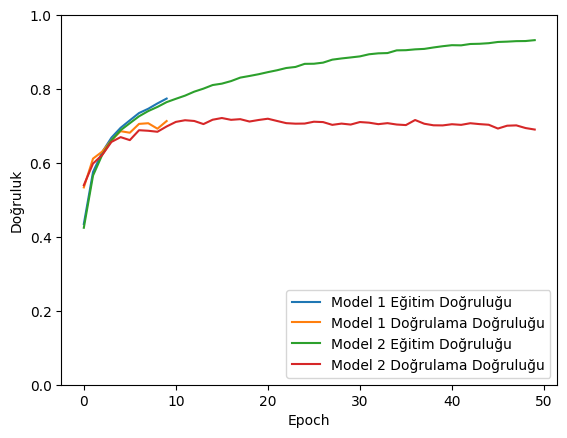

In [49]:
plt.plot(history_3.history['accuracy'], label='Model 3 Eğitim Doğruluğu')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Doğrulama Doğruluğu')
plt.plot(history_5.history['accuracy'], label='Model 5 Eğitim Doğruluğu')
plt.plot(history_5.history['val_accuracy'], label='Model 5 Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Model 6
Model 2 yi farklı yazımını gösterme

In [55]:
model_6 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32,
                         kernel_size=3, # (3, 3)
                         activation="relu",
                         input_shape=(32, 32, 3)),

  tf.keras.layers.MaxPool2D(pool_size=2, # (2, 2)
                            padding="valid"), # padding can also be 'same'

  tf.keras.layers.Conv2D(64, 3, activation="relu"),


  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_6.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(x_train,y_train,
                        epochs=10,
                        validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4495 - accuracy: 0.4788 - val_loss: 1.1749 - val_accuracy: 0.5926
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0950 - accuracy: 0.6205 - val_loss: 1.0453 - val_accuracy: 0.6373
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9783 - accuracy: 0.6593 - val_loss: 0.9883 - val_accuracy: 0.6622
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9065 - accuracy: 0.6865 - val_loss: 0.9625 - val_accuracy: 0.6655
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8428 - accuracy: 0.7076 - val_loss: 0.9594 - val_accuracy: 0.6683
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7922 - accuracy: 0.7254 - val_loss: 0.9036 - val_accuracy: 0.6906
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7392 - accuracy: 0.7430 - val_loss: 0.9205 - val_accuracy:

In [58]:
# Modeli değerlendirin
loss_6, accuracy_6 = model_6.evaluate(x_test, y_test)
print(f'Test Loss-6: {loss_6}')
print(f'Test Accuracy-6: {accuracy_6}')

print(f'Test Loss-2: {loss_2}')
print(f'Test Accuracy-2: {accuracy_2}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9305 - accuracy: 0.6972
Test Loss-6: 0.9304822087287903
Test Accuracy-6: 0.6972000002861023
Test Loss-2: 0.9916369915008545
Test Accuracy-2: 0.6947000026702881
